# **WORLD HAPPINESS REPORT**


I have hypothesis suggestions for analyzing the Happiness Score dataset:

1️⃣ Regional Happiness Score Differences

Hypothesis:
H₀ (Null Hypothesis): There is no significant difference in the average happiness scores across different regions (continents, country groups, etc.).
H₁ (Alternative Hypothesis): There is a significant difference in the average happiness scores across different regions.
Test: ANOVA (or t-test if there are only two groups)

2️⃣ Per Capita Income and Happiness Relationship

Hypothesis:
H₀: There is no significant relationship between per capita income and happiness score.
H₁: There is a significant relationship between per capita income and happiness score.
Test: Pearson Correlation Test

3️⃣ Social Support and Happiness Relationship

Hypothesis:
H₀: There is no significant relationship between social support level and happiness score.
H₁: There is a positive relationship between social support level and happiness score.
Test: Correlation Analysis

4️⃣ Comparison of Happiness Scores Between 2020 and 2024

Hypothesis:
H₀: There is no significant difference in happiness scores between 2020 and 2024.
H₁: There is a significant difference in happiness scores between 2020 and 2024.
Test: Independent Two-Sample t-Test

In [ ]:
import pandas as pd  
import numpy as np  

df= pd.read_csv(r"C:\Users\balla\OneDrive\Documents\CapStoneProject_2025\Combined_Cleaned.csv")

print(df.head())

  Country_name  Happiness_Rank  Happiness_score  Upperwhisker  Lowerwhisker  \
0      Finland               1             7.81          7.87          7.75   
1      Denmark               2             7.65          7.71          7.58   
2  Switzerland               3             7.56          7.63          7.49   
3      Iceland               4             7.50          7.62          7.39   
4       Norway               5             7.49          7.56          7.42   

   Economy_(GDP_per_Capita)\t  Social_support  Healthy_life_expectancy  \
0                        1.29            1.50                     0.96   
1                        1.33            1.50                     0.98   
2                        1.39            1.47                     1.04   
3                        1.33            1.55                     1.00   
4                        1.42            1.50                     1.01   

   Freedom_to_make_life_choices  Generosity  Perceptions_of_corruption  Year  
0

In [ ]:
print(df.columns)

Index(['Country_name', 'Happiness_Rank', 'Happiness_score', 'Upperwhisker',
       'Lowerwhisker', 'Economy_(GDP_per_Capita)\t', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Year'],
      dtype='object')


1️⃣ Regional Happiness Score Differences (Independent Two-Sample t-Test)

seperating countries Asia and Europe :

In [ ]:
asia_countries = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']

europe_countries = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']

# Create a new column for region
def categorize_region(country):
    if country in asia_countries:
        return 'Asia'
    elif country in europe_countries:
        return 'Europe'
    else:
        return 'Other'  # If any country is not in the Asia or Europe lists

df['Region'] = df['Country_name'].apply(categorize_region)


In [ ]:
# Separate data for Asia and Europe
asia_data = df[df['Region'] == 'Asia']['Happiness_score']
europe_data = df[df['Region'] == 'Europe']['Happiness_score']

# Perform independent two-sample t-test
t_test_result = stats.ttest_ind(asia_data, europe_data)
print("T-test Result between Asia and Europe:", t_test_result)


T-test Result between Asia and Europe: TtestResult(statistic=-12.531251817723154, pvalue=2.4120526723954125e-30, df=376.0)


Conclusion:
Given that the p-value is extremely small (much smaller than the common significance threshold of 0.05), you can reject the null hypothesis (H₀) that there is no significant difference in happiness scores between Asia and Europe. This means that there is a statistically significant difference between the two regions' happiness scores.

The negative t-statistic suggests that Asia's happiness score is lower than Europe's on average, but you should check the actual mean values to confirm the direction of the difference.

C:\Users\balla\AppData\Local\Temp\ipykernel_21164\242879408.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Happiness_score', data=df, order=['Asia', 'Europe'], palette='coolwarm')


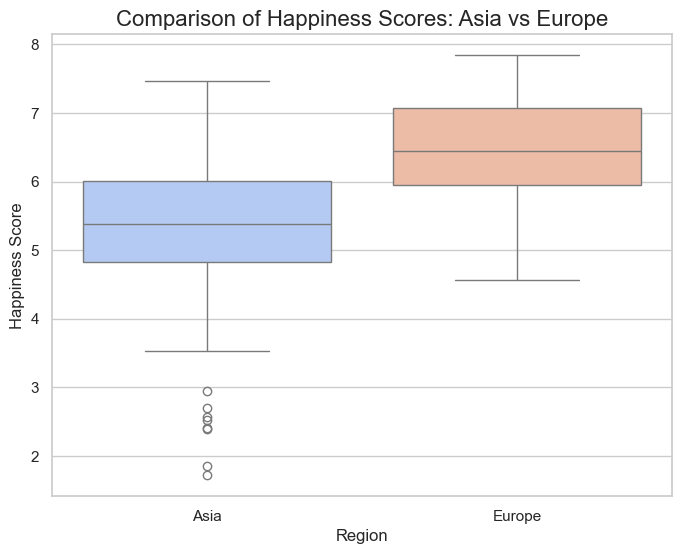

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the seaborn style for better visuals
sns.set(style="whitegrid")

# Create a box plot to visualize the distribution of happiness scores between Asia and Europe
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Happiness_score', data=df, order=['Asia', 'Europe'], palette='coolwarm')

# Adding title and labels
plt.title('Comparison of Happiness Scores: Asia vs Europe', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Show the plot
plt.show()


2️⃣ Per Capita Income and Happiness Relationship (Pearson Correlation Test)

In [ ]:
from scipy.stats import pearsonr

# Assuming the relevant columns are 'Economy_(GDP_per_Capita)' and 'Happiness_score'
gdp_per_capita = df['Economy_(GDP_per_Capita)\t']
happiness_score = df['Happiness_score']

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(gdp_per_capita, happiness_score)

# Display the result
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")



Pearson Correlation Coefficient: 0.6798112559195996
P-value: 7.416501779942453e-100


Conclusion:
There is a significant positive correlation between GDP per Capita and Happiness Score, meaning that higher GDP per capita tends to be associated with higher happiness scores. The strength of this relationship is moderate to strong.

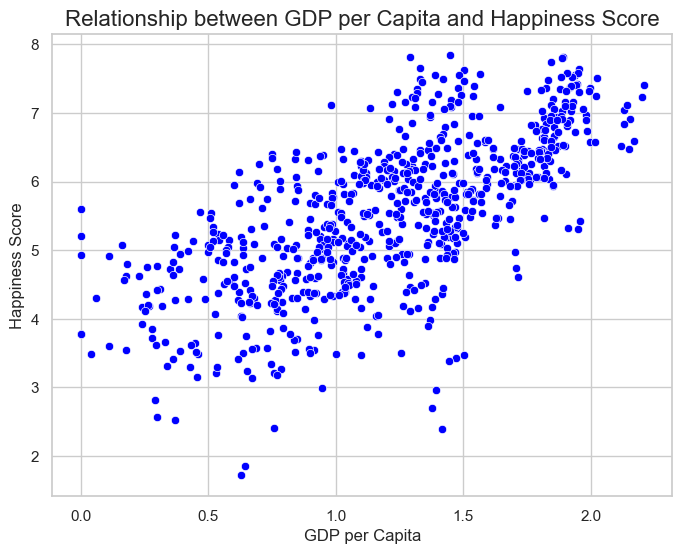

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(8, 6))

# Create scatter plot
sns.scatterplot(x=gdp_per_capita, y=happiness_score, color='blue')

# Add title and labels
plt.title('Relationship between GDP per Capita and Happiness Score', fontsize=16)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Show the plot
plt.show()


3️⃣ Social Support and Happiness Relationship (Correlation Test)

In [ ]:
from scipy.stats import pearsonr

# Assuming the relevant columns are 'Social_support' and 'Happiness_score'
social_support = df['Social_support']
happiness_score = df['Happiness_score']

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(social_support, happiness_score)

# Display the result
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: 0.6975926088247579
P-value: 3.248528751538195e-107


Conclusion:
There is a significant positive correlation between Social Support and Happiness Score, meaning that higher social support tends to be associated with higher happiness scores. The strength of the relationship is moderate to strong.

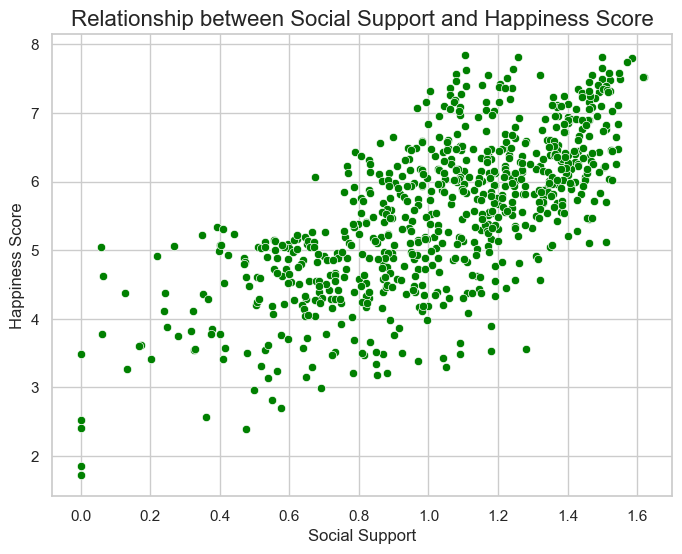

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(8, 6))

# Create scatter plot
sns.scatterplot(x=social_support, y=happiness_score, color='green')

# Add title and labels
plt.title('Relationship between Social Support and Happiness Score', fontsize=16)
plt.xlabel('Social Support', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Show the plot
plt.show()


4️⃣ Comparison of Happiness Scores Between 2020 and 2024  

In [ ]:
from scipy import stats

# Filter the data for 2020 and 2024
data_2020 = df[df['Year'] == 2020]['Happiness_score']
data_2024 = df[df['Year'] == 2024]['Happiness_score']

# Perform independent two-sample t-test
t_test_result = stats.ttest_ind(data_2020, data_2024)

# Display the result
print(f"T-test statistic: {t_test_result.statistic}")
print(f"P-value: {t_test_result.pvalue}")


T-test statistic: -0.40981039323714014
P-value: 0.6822434811499347


Conclusion:
Since the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning that the data provides insufficient evidence to suggest that there is a significant difference in the Happiness Scores between 2020 and 2024.
Essentially, we can conclude that the Happiness Scores in 2020 and 2024 are not significantly different.

C:\Users\balla\AppData\Local\Temp\ipykernel_21164\1032206274.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Happiness_score', data=df, order=[2020, 2024], palette='coolwarm')


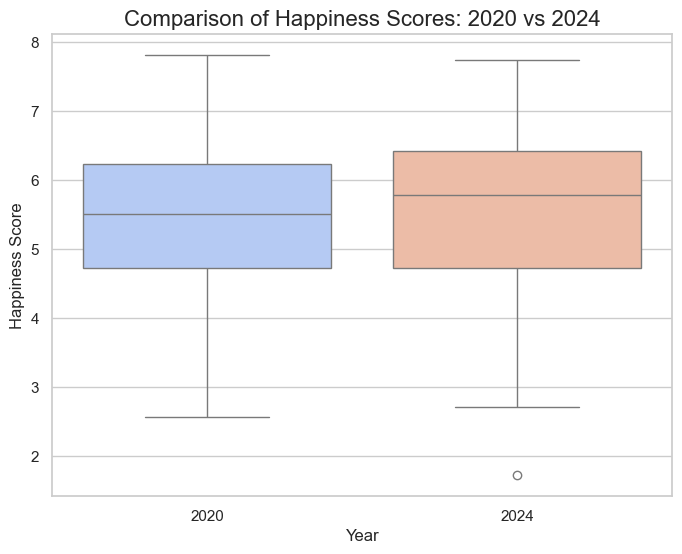

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the seaborn style for better visuals
sns.set(style="whitegrid")

# Create a box plot to visualize the distribution of happiness scores between 2020 and 2024
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='Happiness_score', data=df, order=[2020, 2024], palette='coolwarm')

# Adding title and labels
plt.title('Comparison of Happiness Scores: 2020 vs 2024', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Show the plot
plt.show()


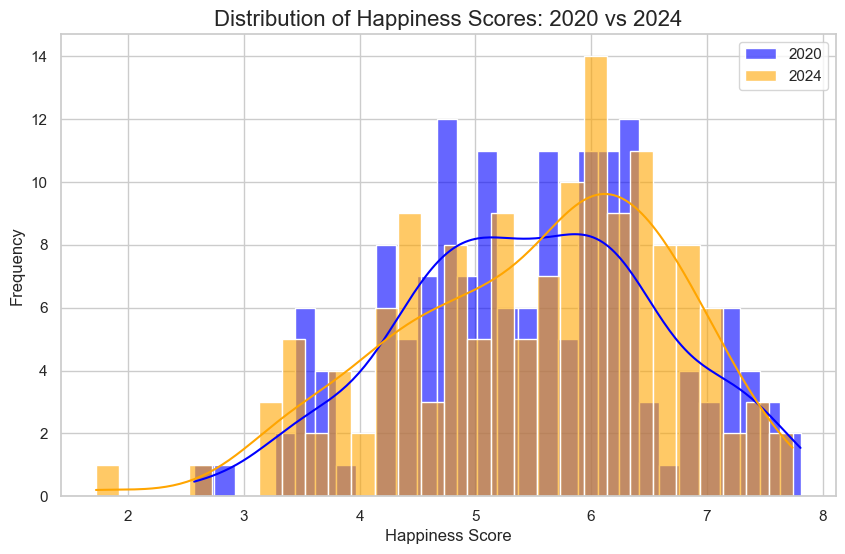

In [ ]:
# Filter data for 2020 and 2024
data_2020 = df[df['Year'] == 2020]['Happiness_score']
data_2024 = df[df['Year'] == 2024]['Happiness_score']

# Create histograms for 2020 and 2024
plt.figure(figsize=(10, 6))

# Plot histogram for 2020
sns.histplot(data_2020, kde=True, color='blue', label='2020', bins=30, alpha=0.6)

# Plot histogram for 2024
sns.histplot(data_2024, kde=True, color='orange', label='2024', bins=30, alpha=0.6)

# Add title and labels
plt.title('Distribution of Happiness Scores: 2020 vs 2024', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show legend
plt.legend()

# Show the plot
plt.show()


## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\balla\\OneDrive\\Documents\\CapStoneProject_2025\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\balla\\OneDrive\\Documents\\CapStoneProject_2025'

# Section 1

Section 1 content

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.